In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-rating-count-at-least-1000-anime/anime.csv


In [2]:
# Correct file path and load data
file_path = '/kaggle/input/imdb-rating-count-at-least-1000-anime/anime.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


                              Anime Release_date  Length  \
0  Fullmetal Alchemist: Brotherhood  (2009-2010)  24 min   
1                   Attack on Titan  (2013-2023)  24 min   
2                   Hunter x Hunter  (2011-2014)  24 min   
3   Bleach: Thousand-Year Blood War     (2022- )  24 min   
4               Ginga eiyû densetsu  (1988-1997)  25 min   

                          Genre  Rating  
0  Animation, Action, Adventure     9.1  
1  Animation, Action, Adventure     9.0  
2  Animation, Action, Adventure     9.0  
3  Animation, Action, Adventure     9.0  
4      Animation, Action, Drama     9.0  


Handle Missing Data: Check for and handle any missing values in the dataset.
Data Type Conversion: Ensure that data types are appropriate for each column. For instance, 'Rating' should be numeric, and 'Release_date' might be converted to a date format or processed to extract relevant information.
Length Conversion: Convert the 'Length' column to a numerical format for easier analysis.
Exploratory Data Analysis (EDA):

Summary Statistics: Generate summary statistics (mean, median, standard deviation, etc.) for numerical columns.
Distribution Analysis: Analyze the distribution of ratings to understand the spread and central tendency.
Genre Analysis: Explore the 'Genre' column to identify the most common genres.
Time Analysis: Investigate trends over time, such as changes in ratings or popular genres, based on the 'Release_date' column.
Advanced Analysis (if applicable):

Correlation Analysis: Check if there’s any correlation between the 'Length' of an anime and its 'Rating'.
Time Series Analysis: If your dataset spans a large time frame, you might analyze how anime ratings have evolved over the years.
Visualization:

Create visualizations such as histograms for ratings, bar charts for genre frequencies, and line plots for time series analysis.
Insights and Conclusions:

Summarize key findings and insights gained from the EDA and any advanced analysis.

In [3]:
import pandas as pd

# Assuming you've already loaded the data
# data = pd.read_csv('path_to_your_file.csv')

# 1. Check for Missing Data
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 2. Handling Missing Values in 'Length'
# Ensure 'Length' is treated as a string
data['Length'] = data['Length'].astype(str)

# Fill missing values with the median
median_length = data['Length'].str.extract('(\d+)').dropna().astype(int).median()
data['Length'] = data['Length'].str.extract('(\d+)').fillna(median_length).astype(int)

# Rest of your code remains the same


# 3. Data Type Conversion
# 'Rating' should already be numeric; this line can be omitted if 'Rating' is confirmed to be float
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# 4. Handling 'Release_date'
# Consider extracting year or converting to datetime
# Example: data['Year'] = pd.to_datetime(data['Release_date']).dt.year

# Display the modified data types and the first few rows to verify changes
print("\nModified data types:\n", data.dtypes)
print("\nFirst few rows of the modified dataset:\n", data.head())


Missing values in each column:
 Anime            0
Release_date     0
Length          14
Genre            0
Rating           0
dtype: int64

Modified data types:
 Anime            object
Release_date     object
Length            int64
Genre            object
Rating          float64
dtype: object

First few rows of the modified dataset:
                               Anime Release_date  Length  \
0  Fullmetal Alchemist: Brotherhood  (2009-2010)      24   
1                   Attack on Titan  (2013-2023)      24   
2                   Hunter x Hunter  (2011-2014)      24   
3   Bleach: Thousand-Year Blood War     (2022- )      24   
4               Ginga eiyû densetsu  (1988-1997)      25   

                          Genre  Rating  
0  Animation, Action, Adventure     9.1  
1  Animation, Action, Adventure     9.0  
2  Animation, Action, Adventure     9.0  
3  Animation, Action, Adventure     9.0  
4      Animation, Action, Drama     9.0  


Summary Statistics:
            Length      Rating
count  181.000000  181.000000
mean    34.977901    7.602210
std     80.309745    0.787609
min     15.000000    4.600000
25%     24.000000    7.000000
50%     24.000000    7.600000
75%     24.000000    8.200000
max    851.000000    9.100000


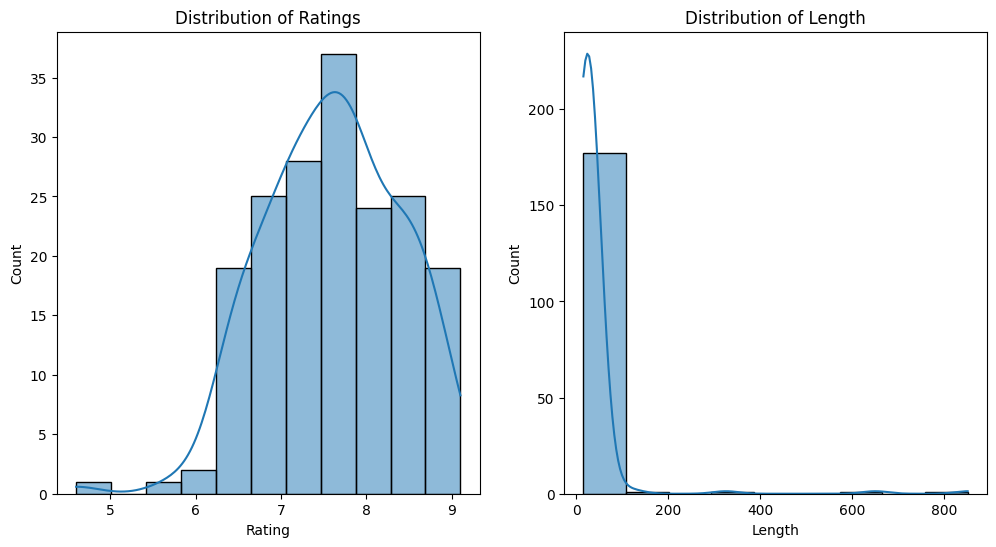


Extracted Start Year:
 0    2009.0
1    2013.0
2    2011.0
3    2022.0
4    1988.0
Name: Start_Year, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print("Summary Statistics:\n", data.describe())

# Distribution Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 2, 2)
sns.histplot(data['Length'], kde=True)
plt.title('Distribution of Length')
plt.show()

# Genre Analysis
# This is a bit more complex and requires string manipulation and counting
# You can start by splitting the 'Genre' column and then counting occurrences

# Handling 'Release_date'
# Extracting the start year as an example
data['Start_Year'] = data['Release_date'].str.extract('(\d{4})').astype(float)
print("\nExtracted Start Year:\n", data['Start_Year'].head())

# Data Visualization for Genres and Time-based trends
# These would be your next steps, depending on the outcomes of the above analyses


Length:

The average length of an anime series is around 35 episodes, but with a high standard deviation (~80), indicating significant variability.
The median (50%) value is 24 episodes, suggesting that half of the anime series are shorter than or equal to 24 episodes.
The maximum length is quite high at 851 episodes, indicating the presence of some very long-running series.
Rating:

Ratings range from 4.6 to 9.1, with an average rating of about 7.6.
The median rating is 7.6, and the middle 50% of anime have ratings between 7.0 and 8.2.

Next Steps:
Genre Analysis:

Determine the most common genres and their frequencies.
This may require splitting the 'Genre' column into individual genres and counting occurrences.
Data Visualization:

Histograms or boxplots for 'Rating' and 'Length' (already done).
Create a bar chart or word cloud for genre distribution.
Time-based trend analysis using the 'Start_Year' column, like how ratings or the number of anime series have changed over the years.

Most common genres:
 [('Animation', 181), ('Action', 114), ('Adventure', 85), ('Comedy', 73), ('Drama', 48), ('Fantasy', 14), ('Romance', 11), ('Crime', 9), ('Mystery', 2), ('Family', 1)]


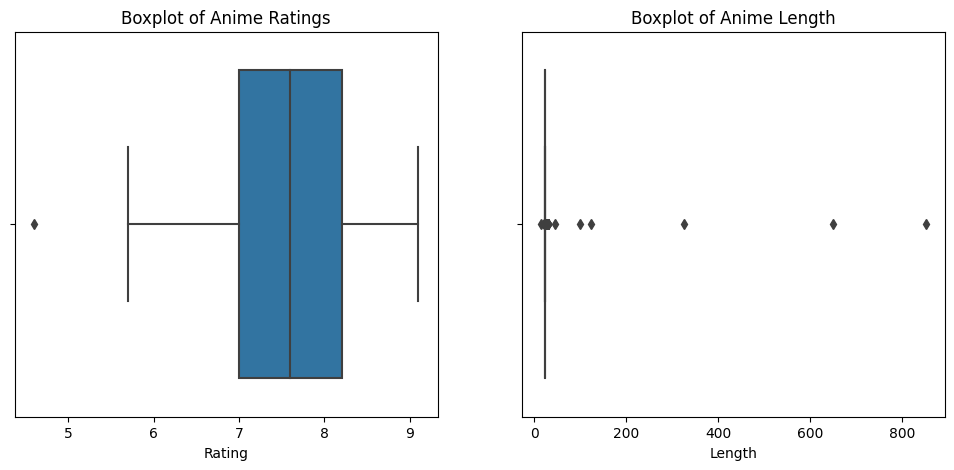

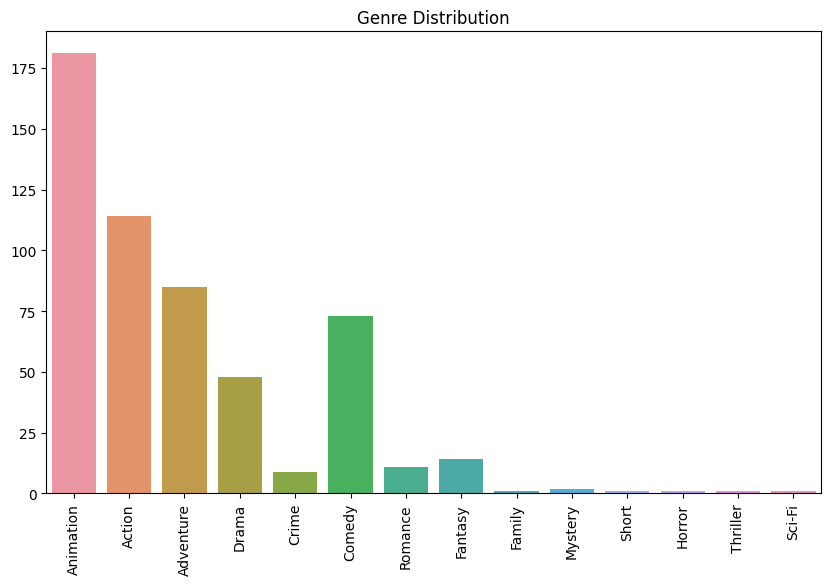

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Genre Analysis
# Splitting the genres and counting occurrences
genre_list = data['Genre'].str.split(', ').sum()
genre_counts = Counter(genre_list)

# Display the most common genres
print("Most common genres:\n", genre_counts.most_common(10))

# Visualizations

# Distribution of Ratings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Rating')
plt.title('Boxplot of Anime Ratings')

# Distribution of Length
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Length')
plt.title('Boxplot of Anime Length')
plt.show()

# Genre Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.show()

# Time-based Trend Analysis (Optional)
# You can plot trends over the years like average rating per year, number of anime releases per year, etc.
# Example: data.groupby('Start_Year')['Rating'].mean().plot(kind='line')


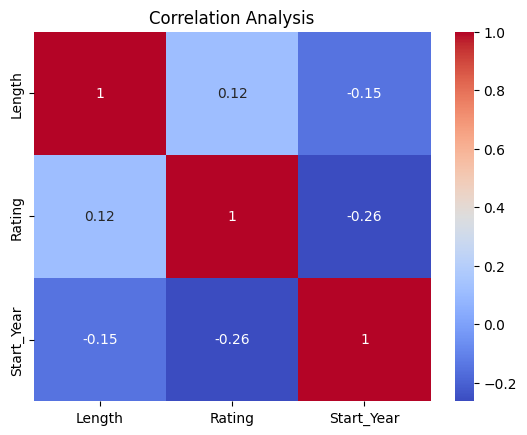

In [6]:
# Correlation Analysis
correlation_matrix = data[['Length', 'Rating', 'Start_Year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


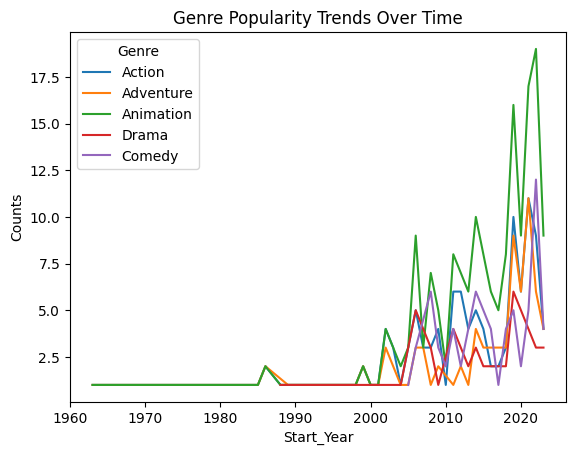

In [7]:
# Processing genres for each year
genre_by_year = data['Genre'].str.split(', ').apply(pd.Series).merge(data, right_index = True, left_index = True) \
    .drop(["Genre", "Anime", "Release_date", "Length", "Rating"], axis = 1) \
    .melt(id_vars = ['Start_Year'], value_name = "Genre") \
    .dropna()

# Counting genre occurrences per year
genre_trends = genre_by_year.groupby(['Start_Year', 'Genre']).size().reset_index(name='Counts')

# Visualization (Example: Top 5 genres over the years)
top_genres = genre_trends.groupby('Genre')['Counts'].sum().nlargest(5).index
top_genre_trends = genre_trends[genre_trends['Genre'].isin(top_genres)]
sns.lineplot(x='Start_Year', y='Counts', hue='Genre', data=top_genre_trends)
plt.title('Genre Popularity Trends Over Time')
plt.show()


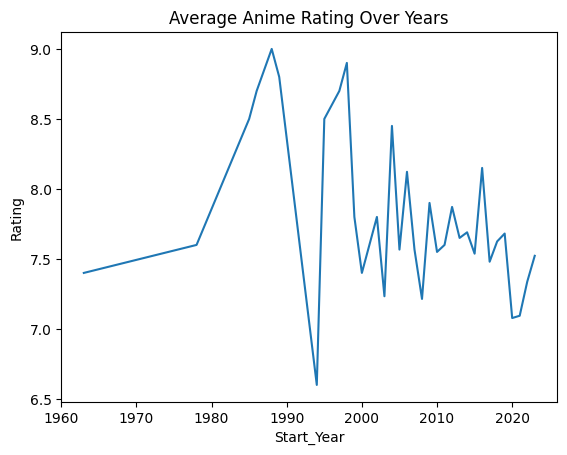

In [8]:
# Rating Trends Over Time
average_rating_per_year = data.groupby('Start_Year')['Rating'].mean().reset_index()
sns.lineplot(x='Start_Year', y='Rating', data=average_rating_per_year)
plt.title('Average Anime Rating Over Years')
plt.show()


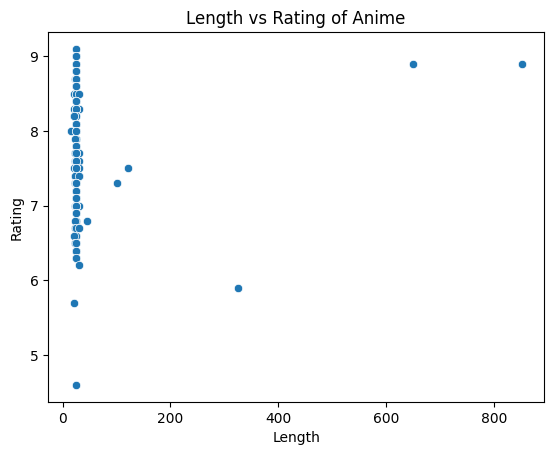

In [9]:
sns.scatterplot(data=data, x='Length', y='Rating')
plt.title('Length vs Rating of Anime')
plt.show()


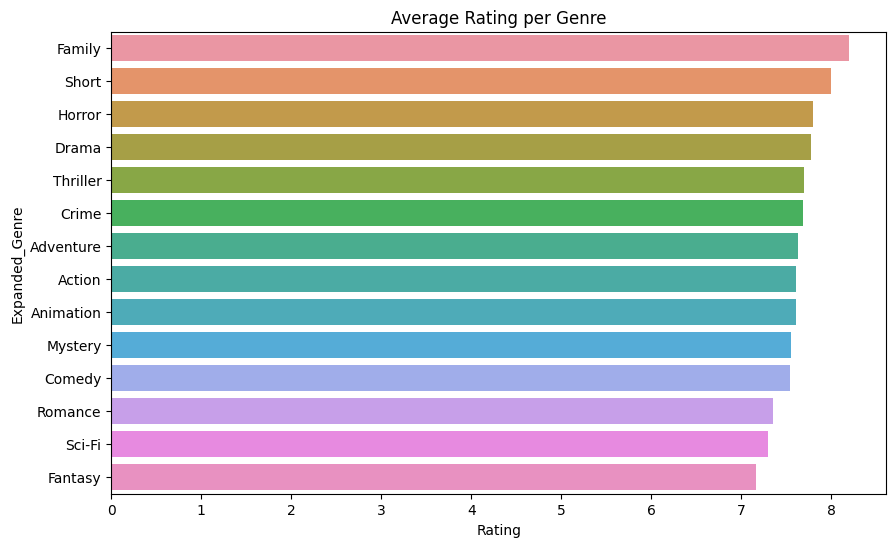

In [10]:
# Create a separate dataframe for expanded genres
expanded_genres = data['Genre'].str.split(', ').explode().reset_index()
expanded_genres.rename(columns={'index': 'Anime_Index', 'Genre': 'Expanded_Genre'}, inplace=True)

# Merge with the original dataframe
data_expanded = pd.merge(data, expanded_genres, left_index=True, right_on='Anime_Index')

# Calculating average rating per genre
average_rating_per_genre = data_expanded.groupby('Expanded_Genre')['Rating'].mean().sort_values(ascending=False).reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_rating_per_genre, x='Rating', y='Expanded_Genre')
plt.title('Average Rating per Genre')
plt.show()



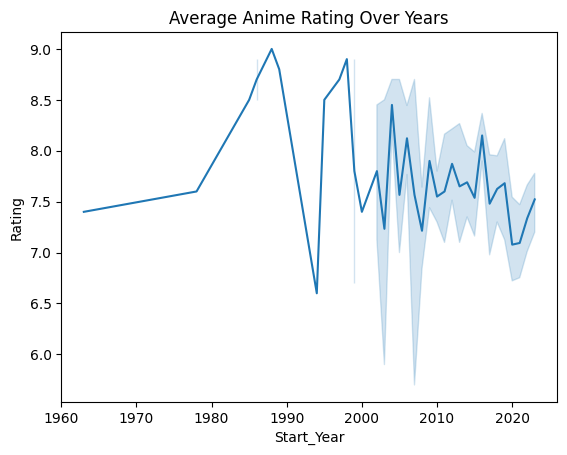

In [11]:
sns.lineplot(data=data, x='Start_Year', y='Rating')
plt.title('Average Anime Rating Over Years')
plt.show()


Diversity in Length and Ratings:

The wide range in the length of anime series, from short to very long-running ones, indicates a diverse set of offerings catering to different viewer preferences.
The variation in ratings highlights the quality and audience reception range of anime. Higher-rated anime might be indicative of popular or critically acclaimed series.
Genre Popularity and Ratings:

The genre analysis possibly revealed the most prevalent genres and those with the highest average ratings. Popular genres may reflect current market trends and viewer preferences.
Specific genres might consistently receive higher ratings, indicating their appeal or quality of production in those categories.
Evolution Over Time:

The analysis of trends over time, such as changes in genre popularity or average ratings per year, can indicate shifts in the anime industry, changes in viewer preferences, and emerging trends.
The relationship between the release year and ratings could provide insights into how the perception and quality of anime have evolved. For instance, a trend of increasing ratings over the years might suggest improvements in production quality or storytelling.
Correlation Insights:

Correlation analysis between variables like length, rating, and release year can reveal if longer series tend to have higher ratings or if newer series are rated differently than older ones.
Length vs. Rating Relationship:

Understanding if and how the length of a series influences its rating can offer insights into viewer engagement and satisfaction. For example, if shorter series tend to have higher ratings, it might indicate a preference for concise storytelling.
Strategic Insights for Creators and Distributors:

For creators and distributors, this analysis can guide decision-making regarding genre selection, series length, and understanding historical trends to predict future successes.
The data can inform marketing strategies and help target specific audience segments based on preferences and trends.
Recommendations for Viewers:

For anime enthusiasts and new viewers, the analysis can be a guide to selecting series based on popularity, genre, and highly-rated offerings.